# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
complete_mouse_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
complete_mouse_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_mouse_data[complete_mouse_data.duplicated(keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26
861,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_mouse_data.loc[complete_mouse_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = complete_mouse_data.drop(complete_mouse_data[complete_mouse_data['Mouse ID'] == 'g989'].index)
cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_tumor_mean = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_tumor_median = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_tumor_variance = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_tumor_std = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_tumor_sem = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_tumor_df = pd.DataFrame({'Mean Tumor Volume': drug_tumor_mean,
                             'Median Tumor Volume': drug_tumor_median,
                             'Tumor Volume Variance': drug_tumor_variance,
                             'Tumor Volume Std. Dev.': drug_tumor_std,
                             'Tumor Volume Std. Err.': drug_tumor_sem})

drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

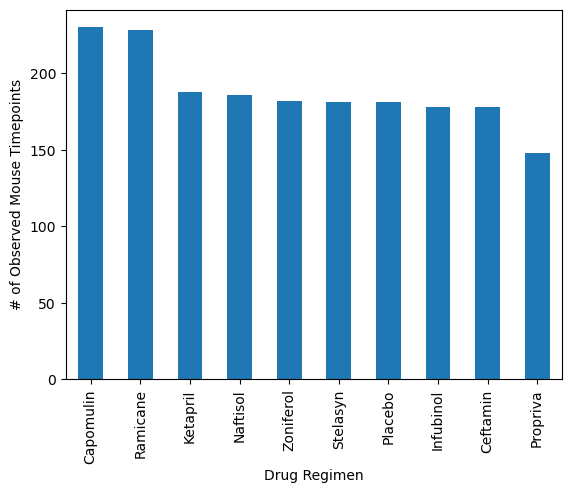

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#find counts for Drug Regimen
#plot with pandas as bar
counts_drug_regimen = cleaned_mouse_data['Drug Regimen'].value_counts()
plot_drug_regimen = counts_drug_regimen.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")

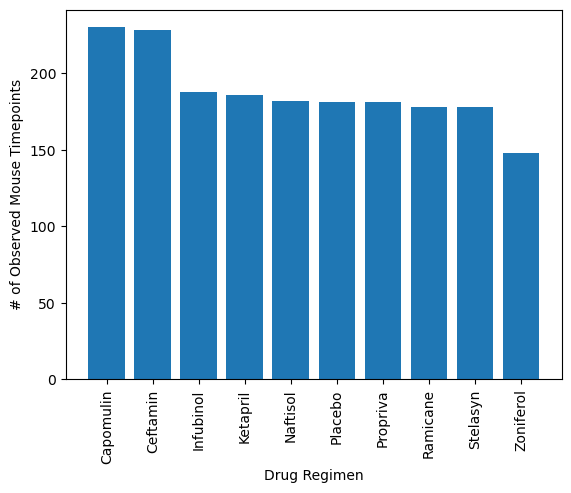

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#create x axis and y axis values
x_axis = drug_tumor_df.index
y_axis = cleaned_mouse_data['Drug Regimen'].value_counts()
# plot graph of series
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = "vertical")
plt.show()

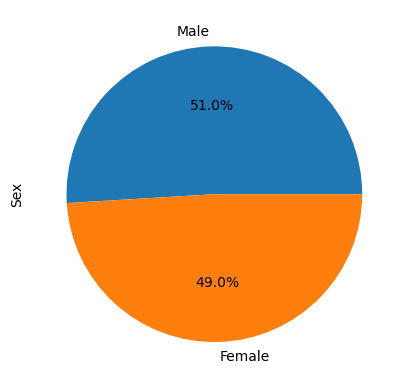

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts_sex = cleaned_mouse_data['Sex'].value_counts()
plot_sex = counts_sex.plot(kind="pie", ylabel="Sex", autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

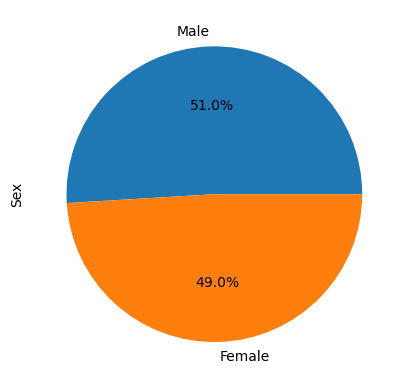

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(counts_sex, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse with groupby & reset Index
last_timepoint = cleaned_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_mouse_data = pd.merge(cleaned_mouse_data, last_timepoint, on=["Mouse ID", "Timepoint"], how='inner')
updated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Each treatment has 25 values: updated_mouse_data.value_counts()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Use a for loop to find each occurance of mouse on the treatments

for drug in treatments:
    # in each row, locate the drug in treatments. create as variable.
    drug_data = updated_mouse_data.loc[updated_mouse_data['Drug Regimen'] == drug]
    final_tumor_vol = drug_data['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds (also in for loop)
    q1 = final_tumor_vol.quantile(0.25)
    q3 = final_tumor_vol.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(drug, outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


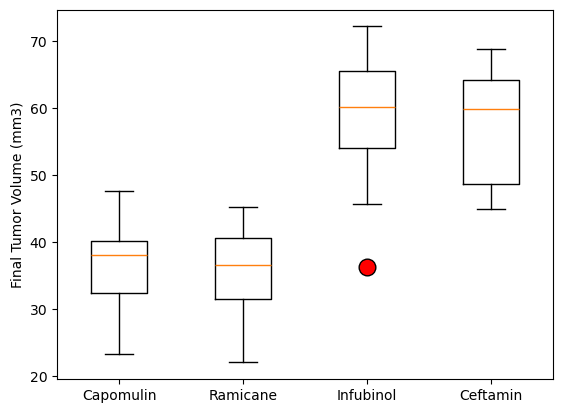

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

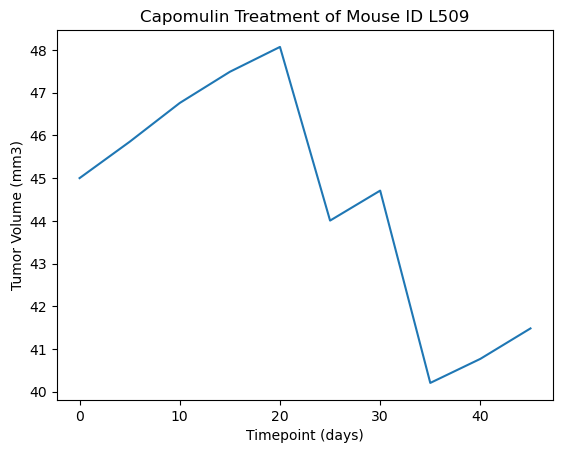

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse (l509) treated with Capomulin
mouse_l509_bool = cleaned_mouse_data['Mouse ID'] == 'l509'
mouse_l509 = cleaned_mouse_data.loc[mouse_l509_bool]

#plot line
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse ID L509')
plt.show()

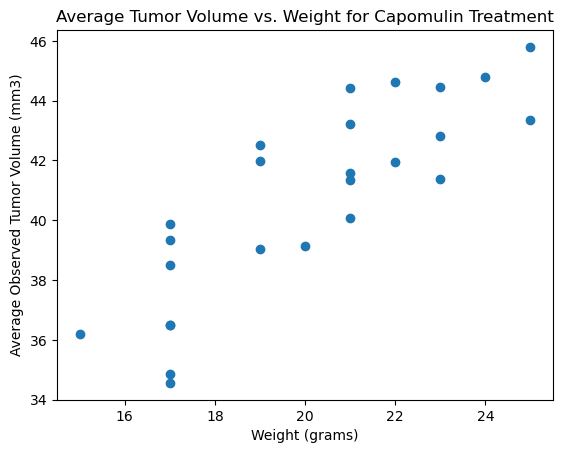

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Get only Capomulin data for each timepoint of a mouse ID
capomulin_data = cleaned_mouse_data['Drug Regimen'] == 'Capomulin'
capomulin_data_only = cleaned_mouse_data.loc[capomulin_data]

#plot scatter. use means of weight and tumor as x/y values
x_wt = capomulin_data_only.groupby('Mouse ID')['Weight (g)'].mean()
y_tumor = capomulin_data_only.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(x_wt, y_tumor)

#add plt labels, title, etc. then print
plt.xlabel('Weight (grams)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin Treatment')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.7088568047708723


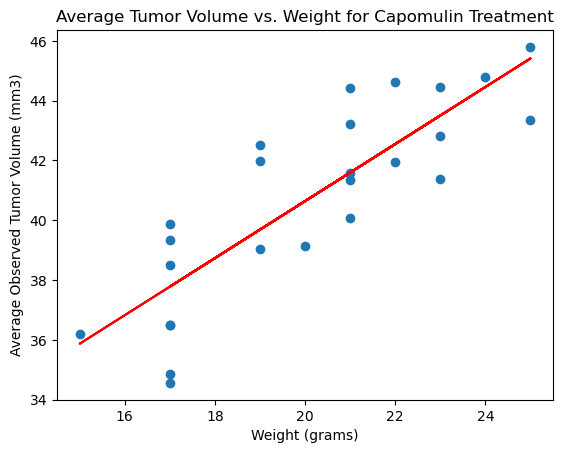

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_wt, y_tumor)
regress_values = x_wt * slope + intercept

#plot scatter plot and line regression
plt.scatter(x_wt, y_tumor)
plt.plot(x_wt, regress_values, "r-")

#add labels/title
plt.xlabel('Weight (grams)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin Treatment')

#print correlation coefficient and full plot
print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")
plt.show()